# Image Exploration

In this notebook we will use torchvision to look at the images we have. In this version we will be exploring the UTKFace, and crop_part1 image folders along with manually added images from IMDb and Wiki datasets. In the next version I will use all images.

In [3]:
from __future__ import print_function, division
import os
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import torch
import torchvision
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms, utils, datasets
%matplotlib inline

In [4]:
os.chdir('Face_Age_Dataset/')

In [5]:
folders = os.listdir(os.path.join(os.getcwd()))
folders

['0-4',
 '10-14',
 '15-19',
 '20-24',
 '25-29',
 '30-34',
 '35-39',
 '40-44',
 '45-49',
 '5-9',
 '50-54',
 '55-59',
 '60-64',
 '65+']

In [6]:
# reorder the list to be in proper order (it isn't because they are strings)
order = [0,9,1,2,3,4,5,6,7,8,10,11,12,13]
folders = [folders[i] for i in order]

In [7]:
age_categories = {}
for count,item in enumerate(folders):
    print(count, item)
    age_categories[item] = len(os.listdir(str(item)))

0 0-4
1 5-9
2 10-14
3 15-19
4 20-24
5 25-29
6 30-34
7 35-39
8 40-44
9 45-49
10 50-54
11 55-59
12 60-64
13 65+


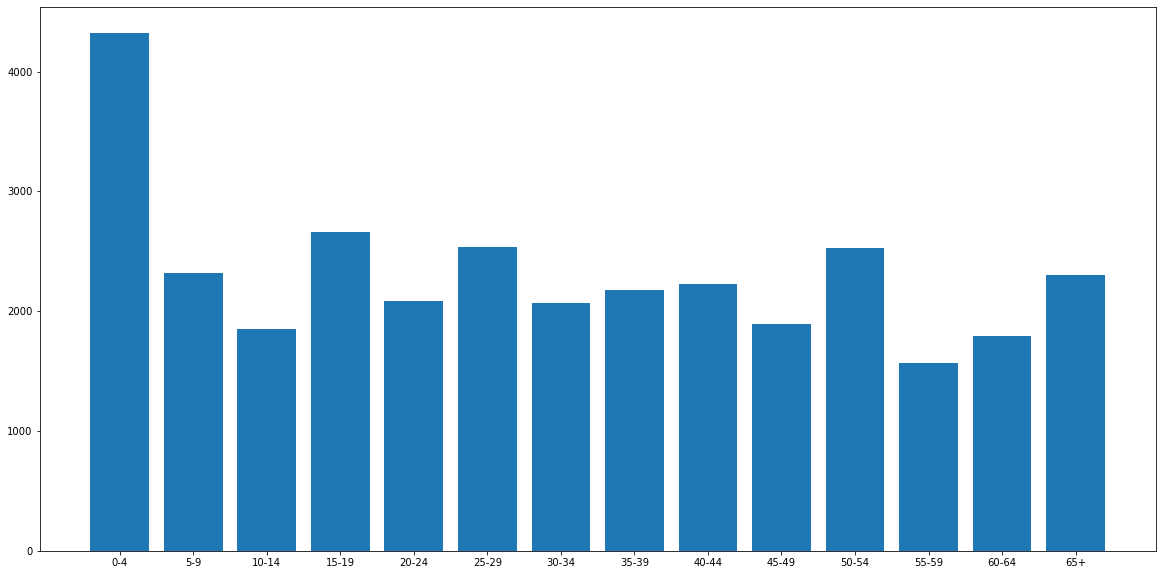

In [8]:
plt.figure(figsize=(20,10))
plt.bar(range(len(age_categories)), list(age_categories.values()), align='center')
plt.xticks(range(len(age_categories)), list(age_categories.keys()))

plt.show()

We can see that 0-4 year olds have the majority of images.

In [9]:
print('Total number of images are',sum(age_categories.values()))

Total number of images are 32330


## Exploration with Torchvision

### No transformations

In [10]:
data_dir = os.getcwd()

In [24]:
# create data transforms. This is used to make the data more general 
# instead of training on a specific pose of alignment of the image
data_transforms = transforms.Compose([
        transforms.Resize(size=(200,200)),
        transforms.ToTensor()
    ])

In [25]:
image_dataset = datasets.ImageFolder(os.path.join(data_dir), data_transforms) # obtain the data and apply transforms
dataloaders = torch.utils.data.DataLoader(image_dataset, batch_size=16,
                                             shuffle=True, num_workers=4) # load the data, take batches and shuffle
dataset_size = len(image_dataset) # obtain the size
class_names = image_dataset.classes # get the classes

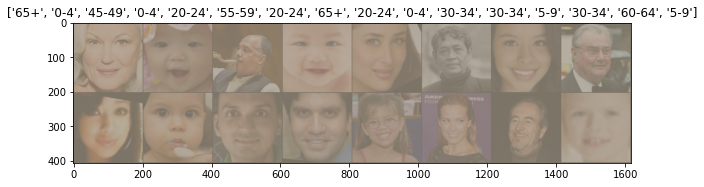

In [26]:
def imshow(inp, title=None):
    """Imshow for Tensor."""
    inp = inp.numpy().transpose((1, 2, 0))
    mean = np.array([0.485, 0.456, 0.406])
    std = np.array([0.229, 0.224, 0.225])
    inp = std * inp + mean
    inp = np.clip(inp, 0, 1)
    plt.figure(figsize=(10,10))
    plt.imshow(inp)
    if title is not None:
        plt.title(title)
    plt.pause(0.001)  # pause a bit so that plots are updated


# Get a batch of training data
inputs, classes = next(iter(dataloaders))

# Make a grid from batch
out = torchvision.utils.make_grid(inputs)

imshow(out, title=[class_names[x] for x in classes])

## Let's take a look at some of the Transforms we can make using torchvision

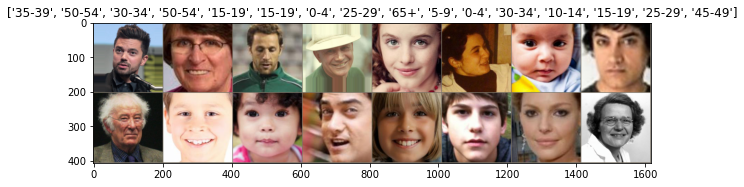

In [29]:
data_transforms = transforms.Compose([
        transforms.Resize(size=(200,200)),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225]) # add normalization
    ])
image_dataset = datasets.ImageFolder(os.path.join(data_dir), data_transforms) # obtain the data and apply transforms
dataloaders = torch.utils.data.DataLoader(image_dataset, batch_size=16,
                                             shuffle=True, num_workers=4) # load the data, take batches and shuffle
dataset_size = len(image_dataset) # obtain the size
class_names = image_dataset.classes # get the classes

# Get a batch of training data
inputs, classes = next(iter(dataloaders))

# Make a grid from batch
out = torchvision.utils.make_grid(inputs)

imshow(out, title=[class_names[x] for x in classes])

Notice how the brightness and saturation have improved after normalizing the images.

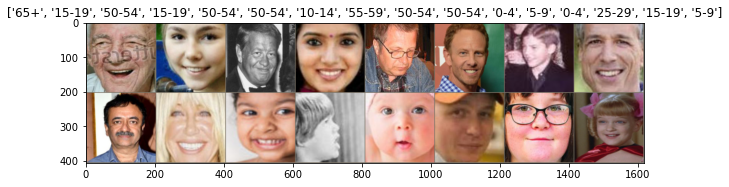

In [33]:
data_transforms = transforms.Compose([
        transforms.Resize(size=(200,200)),
        transforms.RandomResizedCrop(200, (0.8,1.0)), # Crop the given PIL Image to random size and aspect ratio
        transforms.RandomHorizontalFlip(), # horizontally flips the image with a probability of 0.5
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ])

image_dataset = datasets.ImageFolder(os.path.join(data_dir), data_transforms) # obtain the data and apply transforms
dataloaders = torch.utils.data.DataLoader(image_dataset, batch_size=16,
                                             shuffle=True, num_workers=4) # load the data, take batches and shuffle
dataset_size = len(image_dataset) # obtain the size
class_names = image_dataset.classes # get the classes

# Get a batch of training data
inputs, classes = next(iter(dataloaders))

# Make a grid from batch
out = torchvision.utils.make_grid(inputs)

imshow(out, title=[class_names[x] for x in classes])